# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV, LassoCV, ElasticNet,ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score,mean_squared_log_error
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as scalar
from sklearn.model_selection import learning_curve, ShuffleSplit

### Loading Boston Data

In [2]:
boston = load_boston()

### Seeing all features of our load Data

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston.filename

'C:\\Users\\Nabeel Fahmi\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [7]:
bos = pd.DataFrame(boston.data)

In [8]:
bos.columns = boston.feature_names

In [9]:
Boston = bos

In [10]:
Boston["Price"] = pd.DataFrame(boston.target)

In [11]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Understandig Our Data

In [12]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
Boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### From above info we can say that there is zero null value(nan) so we proced with our data

## Now we will visulize with or data with our traget coloum to see what relation it makes with our feature coloum

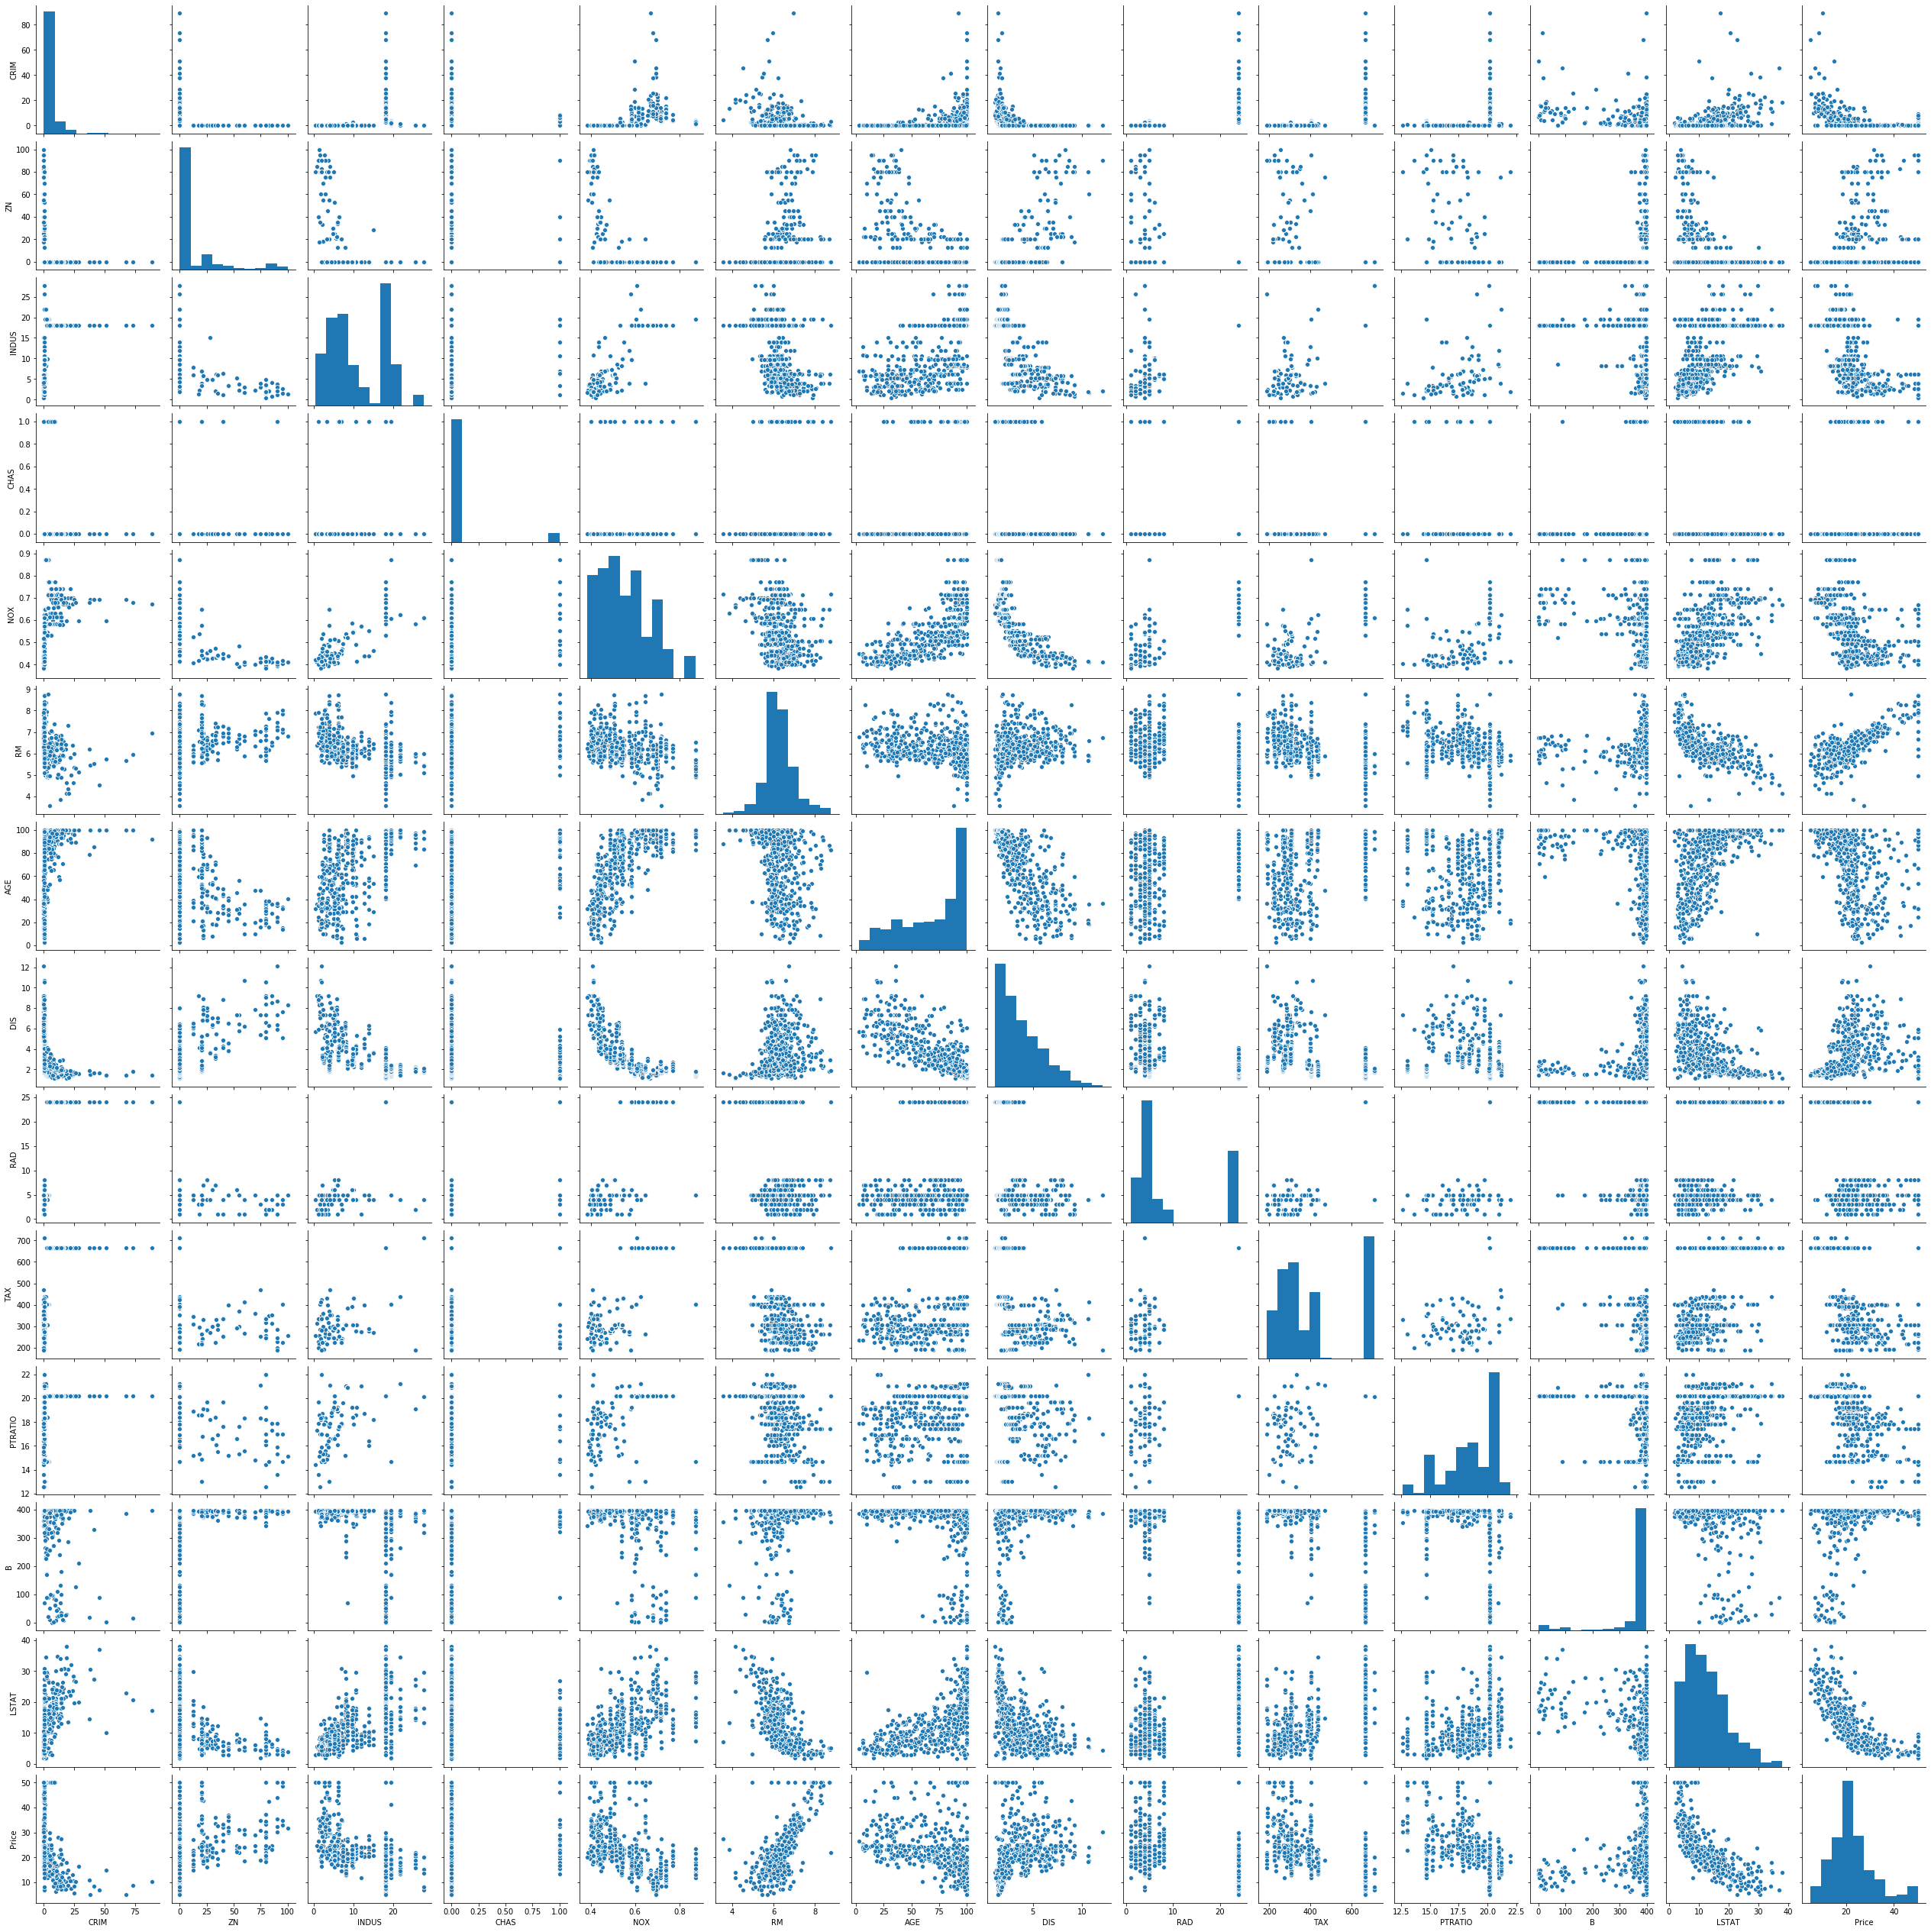

In [15]:
sns.pairplot(Boston) #ploting pair plot for our Data set

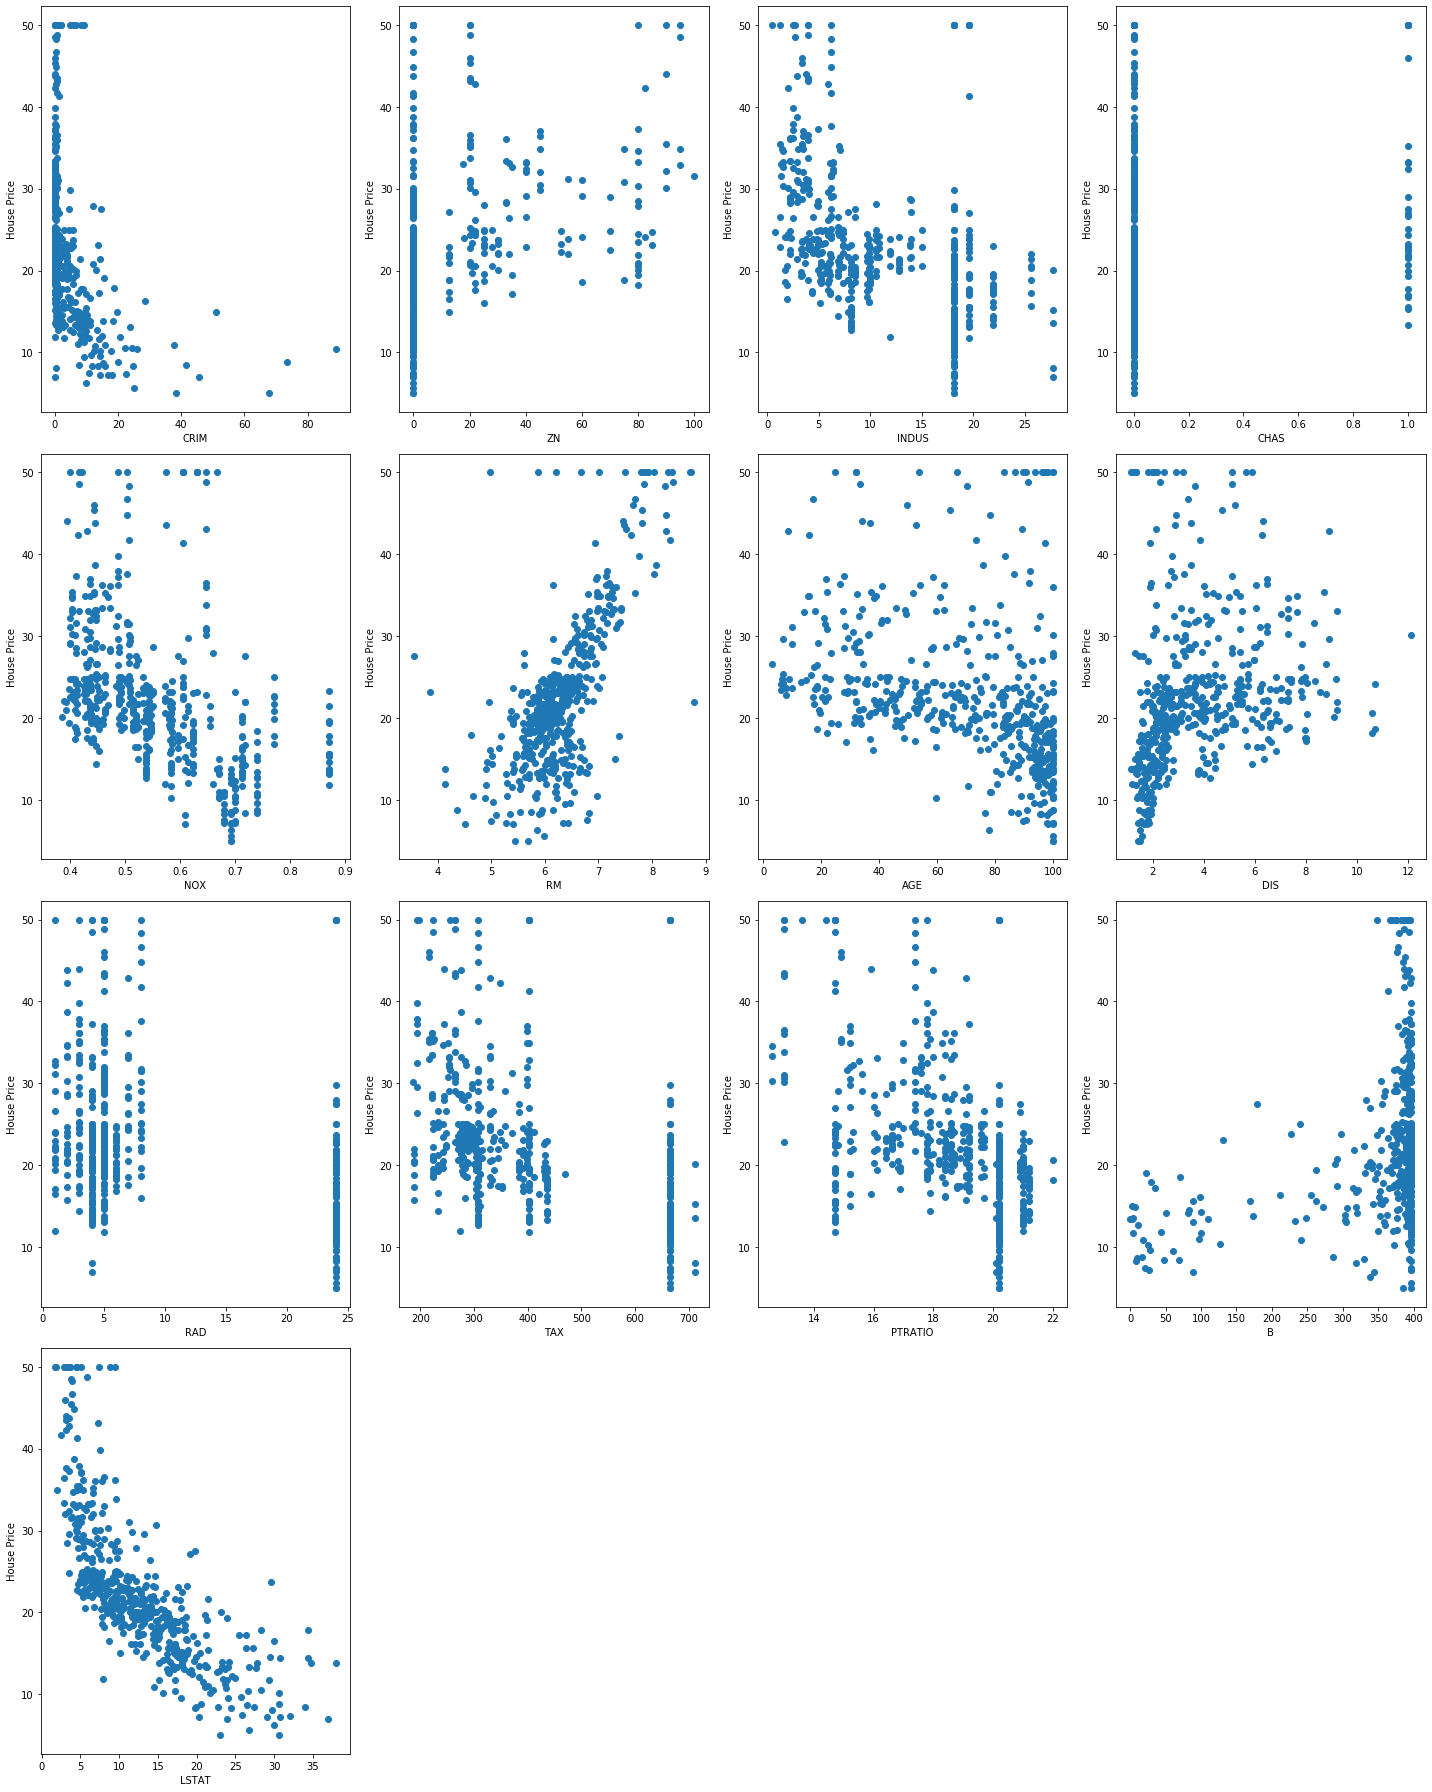

In [16]:
plt.figure(figsize=(20,25), facecolor='white')  #creating A blanck figure
plotnumber = 1

for column in Boston.columns:
    if plotnumber<=16 :
        if (column != 'Price'):
            ax = plt.subplot(4,4,plotnumber)                #Creating Sub plot 
            plt.scatter(Boston[column],Boston['Price'])     # Ploting scatter plot
            plt.xlabel(column)                              # giving X axis name 
            plt.ylabel("House Price")                       # giving Y axis name
        plotnumber+=1
plt.tight_layout()                                          # ploting figure 

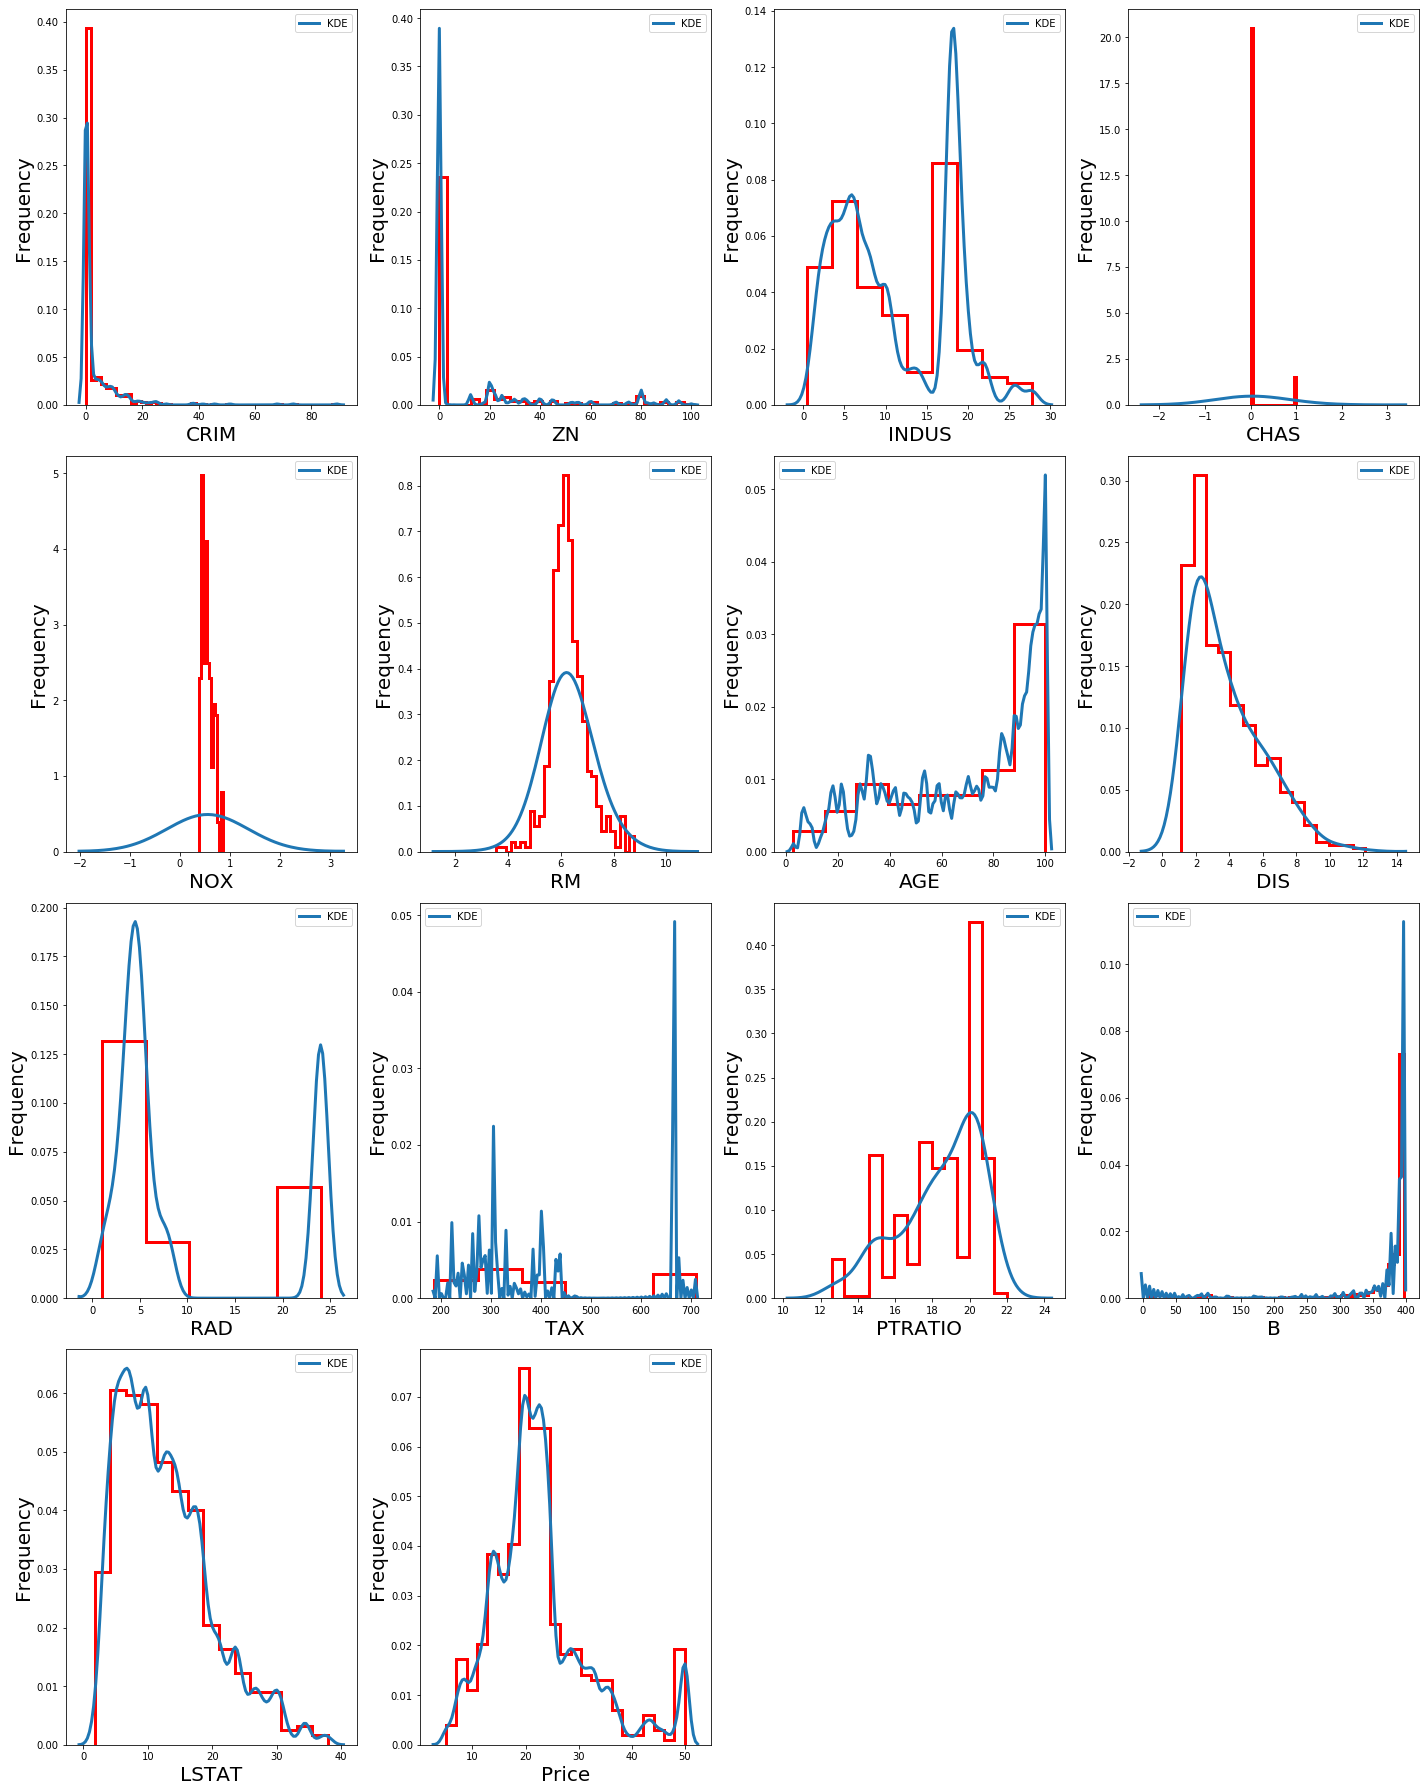

In [17]:
plt.figure(figsize=(20,25), facecolor='white')                                      # Creating Blank figure 
plotnumber = 1

for column in Boston:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)                                            # Creating subplots
        sns.distplot(Boston[column],
                       kde_kws={"lw": 3, "label": "KDE", "bw" : 0.8 },
                       hist_kws={"histtype": "step", "linewidth": 3,
                                 "alpha": 1, "color": "r"})                         # Ploting Distplot
        plt.xlabel(column,fontsize=20)                                              # giving x axis name
        plt.ylabel('Frequency',fontsize=20)                                         # giving Y axis name
    plotnumber+=1
plt.tight_layout()                                                                  # ploting figure 

In [18]:
correlation  = Boston.corr()                                            # Creating Correlation Matrix
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


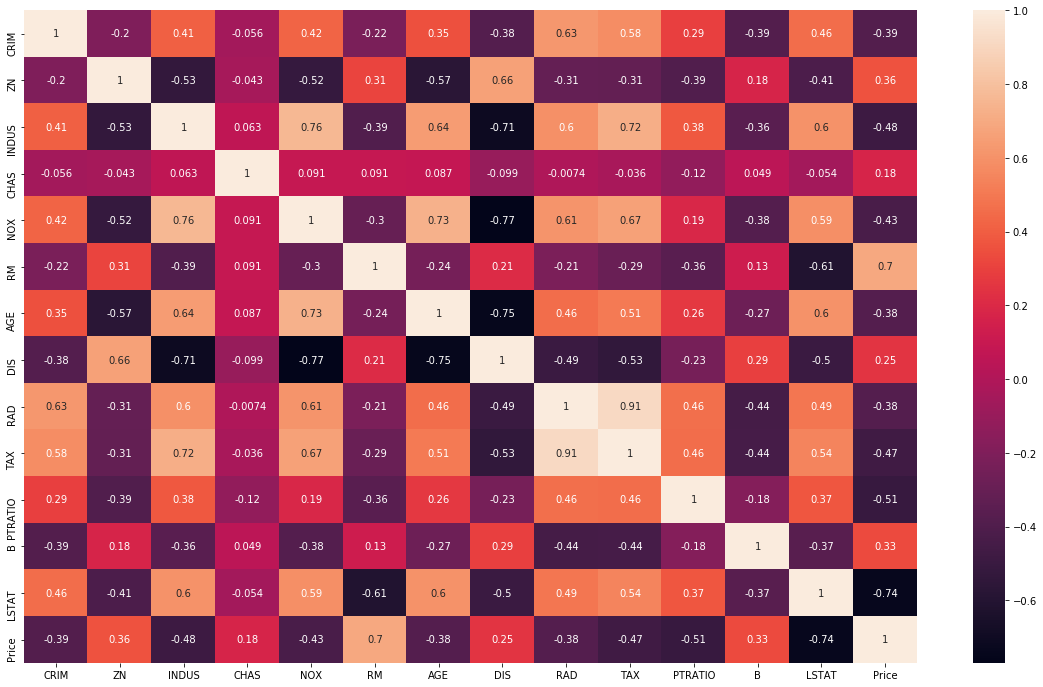

In [19]:
plt.figure(figsize=(20,12))                                        # Creting a blank figure
sns.heatmap(correlation,annot=True)                                # Ploting correlation  matrix

In [20]:
def getCorrelatedfeatures(correlation, threshold):                # Creating function high correlated features for our target column
    feature =[]
    value = []
    for i, index in enumerate(correlation.index):
        if abs(correlation[index])> threshold:
            feature.append(index)
            value.append(correlation[index])
    df = pd.DataFrame(data = value, index = feature,)
    return df

In [21]:
threshold = 0.50                                                          # Giveing treshold value
corr_value = getCorrelatedfeatures(correlation["Price"], threshold)       # passing requried values to the function 
corr_value.drop("Price",inplace = True)
corr_value

,0
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663


In [22]:
def adj_r2(x,y,r2):                                            # Creating function for adjested r2 square
    
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

### Removing multicollinearity from our Data set by Vif

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

x_multi = bos.drop(['Price'], axis = 1)

scaler = StandardScaler()
x_multi_scaled = scaler.fit_transform(x_multi)

variables = x_multi_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = x_multi.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [24]:
New = bos.drop(["RAD", "Price", "TAX" ], axis = 1,)         # Droping high Vif value features from data set

## Model 1 testing after removing high VIF columns 

In [25]:
XX = New                                                        # Creating x varaiable for model
YY = Boston["Price"]                                            # Creating y variable for model
LInear = LinearRegression(normalize=True)                       # creating liner regreesion for model
XX_train,XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size = 0.25,random_state=42)   # Spliting data set for train and test
LInear.fit(XX_train, YY_train)                                   # fitting our dataset to our linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
R2_Score_train_model1 = round(LInear.score(XX_train,YY_train)*100,2)                  # calculating R2 score for train data
ADj_r2score_train_model1 = round(adj_r2(XX_train,YY_train,R2_Score_train_model1),2)   # calculating Adjsted R2 score for train data 
R2_Score_test_model1 = round(LInear.score(XX_test,YY_test)*100,2)                     # calculating R2 score for test data
ADj_r2score_test_model1 = round(adj_r2(XX_test,YY_test,R2_Score_test_model1),2)       # calculating Adjusted R2 score for test data

print("Train: r2_score:", R2_Score_train_model1)
print("Train: Adj r2_score:", ADj_r2score_train_model1)
print("Train: r2_score_test:", R2_Score_test_model1)
print("Train: Adj r2_score_test:", ADj_r2score_test_model1)

YY_pred = LInear.predict(XX_test)                                                    # predicting value for our test data
print(YY_test.head(),YY_pred[0:5])

Train: r2_score: 74.05
Train: Adj r2_score: 76.24
Train: r2_score_test: 65.92
Train: Adj r2_score_test: 72.13
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64 [28.62061378 35.8860361  18.81471159 25.37772382 18.02482214]


In [27]:
mean_squared_error_model1 = mean_squared_error(YY_test, YY_pred)                   # Calcuating mean squared error
mean_absolute_error_model1 = mean_absolute_error(YY_test, YY_pred)                 # Calculating mean absolute error
print(mean_squared_error_model1)
print(mean_absolute_error_model1)

23.86596619243398
3.1893131143214704


## Model 2 is created on base of high corelation features to our depending variable and threshod is 0.5

In [28]:
x = bos[corr_value.index]                                               # Creating x varaiable for model
y = Boston["Price"]                                                     # Creating y variable for model
linear = LinearRegression(normalize=True)                               # creating liner regreesion for model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)    # Spliting data set for train and test

In [29]:
linear.fit(x_train,y_train)                                              # fitting our dataset to our linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [30]:
r2_score_train_model2 = round(linear.score(x_train,y_train)*100,2)                    # calculating R2 score for train data
adj_r2score_train_model2 = round(adj_r2(x_train,y_train,r2_score_train_model2),2)     # calculating Adjsted R2 score for train data
r2_score_test_model2 = round(linear.score(x_test,y_test)*100,2)                       # calculating R2 score for test data
adj_r2score_test_model2 = round(adj_r2(x_test,y_test,r2_score_test_model2),2)         # calculating Adjusted R2 score for test data

print("Train: r2_score:",r2_score_train_model2)
print("Train: Adj r2_score:",adj_r2score_train_model2)
print("Train: r2_score_test:",r2_score_test_model2)
print("Train: Adj r2_score_test:",adj_r2score_test_model2)

y_pred = linear.predict(x_test)                                                        # predicting value for our test data                                                       
print(y_test.head(),y_pred[0:5])

Train: r2_score: 68.78
Train: Adj r2_score: 69.32
Train: r2_score_test: 63.32
Train: Adj r2_score_test: 64.84
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64 [26.7983917  30.78363411 16.47209036 24.94387986 18.35189369]


In [31]:
mean_squared_error_model2 = mean_squared_error(y_test, y_pred)                   # Calcuating mean squared error
mean_absolute_error_model2 = mean_absolute_error(y_test, y_pred)                 # Calculating mean absolute error
print(mean_squared_error_model2)
print(mean_absolute_error_model2)

25.688824196675952
3.3918448293813968


## Model 3 is created useing all indipendet variable and dependent variable

In [32]:
X = Boston.drop("Price", axis = 1)                                      # Creating x variable for model
Y = Boston["Price"]                                                     # Creating y variable for model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=42)  # Spliting data set for train and test
Linear = LinearRegression(normalize=True)                               # creating liner regreesion for model
Linear.fit(X_train, Y_train)                                            # fitting our dataset to our linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
R2_score_train_model3 = round(Linear.score(X_train,Y_train)*100,2)                        # calculating R2 score for train data
Adj_r2score_train_model3 = round(adj_r2(X_train,Y_train,R2_score_train_model3),2)         # calculating Adjusted R2 score for train data
R2_score_test_model3 = round(Linear.score(X_test,Y_test)*100,2)                           # calculating R2 score for test data
Adj_r2score_test_model3 = round(adj_r2(X_test,Y_test,R2_score_test_model3),2)             # calculating Adjusted R2 score for test data


print("Train: r2_score:",R2_score_train_model3)
print("Train: Adj r2_score:",Adj_r2score_train_model3)
print("Train: r2_score_test:",R2_score_test_model3)
print("Train: Adj r2_score_test:",Adj_r2score_test_model3)

Y_pred = Linear.predict(X_test)                                                           # predicting value for our test data

print(Y_test.head(),Y_pred[0:5])

Train: r2_score: 74.81
Train: Adj r2_score: 77.44
Train: r2_score_test: 68.44
Train: Adj r2_score_test: 76.2
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64 [28.83885359 36.00783288 15.08324755 25.23090886 18.87864064]


In [34]:
mean_squared_error_model3 = mean_squared_error(Y_test, Y_pred)             # Calcuating mean squared error
mean_absolute_error_model3 = mean_absolute_error(Y_test, Y_pred)           # Calculating mean absolute error
print(mean_squared_error_model3)
print(mean_absolute_error_model3)

22.09869482709798
3.0609395954370333


## From all above model we can say that our Model 3 is working good on basis of mean_squared_error and mean_absolute_error

## Now we will check that our model is over fitting or not lasoo regresion

### Model 3

In [35]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [36]:
lasso_alpha = lasscv.alpha_

In [37]:
lasso_reg = Lasso(alpha=lasso_alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.00035978708150203063, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
lasso_score_train_model3 = round((lasso_reg.score(X_train, Y_train)*100),2)
lasso_score_test_model3  = round((lasso_reg.score(X_test,Y_test)*100),2)
print("Train  :",lasso_score_train_model3)
print("Test   :",lasso_score_test_model3)

Train  : 74.81
Test   : 68.44


### Model 2

In [39]:
Lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
Lasscv.fit(x_train, y_train)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [40]:
Lasso_alpha = Lasscv.alpha_

In [41]:
Lasso_reg = Lasso(alpha=Lasso_alpha)
Lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00035978708150203063, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
Lasso_score_train_model2 = round((Lasso_reg.score(x_train, y_train)*100),2)
Lasso_score_test_model2  = round((Lasso_reg.score(x_test,y_test)*100),2)
print("Train  :",Lasso_score_train_model2)
print("Test   :",Lasso_score_test_model2)

Train  : 68.78
Test   : 63.32


### Model 1

In [43]:
LAsscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
LAsscv.fit(XX_train, YY_train)
LAsso_alpha = LAsscv.alpha_
LAsso_reg = Lasso(alpha=Lasso_alpha)
LAsso_reg.fit(XX_train, YY_train)
LAsso_score_train_model1 = round((LAsso_reg.score(XX_train, YY_train)*100),2)
LAsso_score_test_model1  = round((LAsso_reg.score(XX_test,YY_test)*100),2)
print("Train  :",LAsso_score_train_model1)
print("Test   :",LAsso_score_test_model1)

Train  : 74.05
Test   : 65.92


### From above descison we can see that their is no change in R2 value and Adj R2 value in our model 3 

### Now we will check Redige regeression

### Model 1 

In [44]:
alphas = np.random.uniform(low=0, high=10, size=(50,))

In [45]:
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(XX_train,YY_train)

RidgeCV(alphas=array([6.98419952, 0.41950954, 6.54922339, 2.20304117, 2.98995383,
       5.89583733, 9.24188536, 0.86495488, 0.15965026, 8.07254424,
       8.82353388, 5.05798474, 6.77733771, 7.34615453, 1.39635245,
       2.91872133, 8.52217226, 1.79484442, 8.48923687, 5.23453543,
       0.5293658 , 7.07715004, 4.6698266 , 5.84424888, 4.90651844,
       4.36485989, 1.60686686, 3.55856606, 5.6002583 , 2.27196453,
       4.97664992, 9.58530836, 6.52788898, 5.62731328, 1.67039294,
       7.3304487 , 1.03959455, 6.870558  , 7.68952318, 0.60095197,
       7.62224974, 3.21279813, 2.04324493, 4.47951792, 7.09786766,
       9.49198016, 4.12980596, 7.98317604, 3.62481743, 7.83869397]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [46]:
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(XX_train, YY_train)

Ridge(alpha=0.15965026300646445, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
ridge_score_train_model1 = round(ridge_model.score(XX_train,YY_train)*100,2)
ridge_score_test_model1 = round(ridge_model.score(XX_test, YY_test)*100,2)
print("Train score:- " , ridge_score_train_model1)
print("Test score:- ", ridge_score_test_model1)

Train score:-  74.04
Test score:-  65.87


### Model 2

In [48]:
Ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
Ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.98419952, 0.41950954, 6.54922339, 2.20304117, 2.98995383,
       5.89583733, 9.24188536, 0.86495488, 0.15965026, 8.07254424,
       8.82353388, 5.05798474, 6.77733771, 7.34615453, 1.39635245,
       2.91872133, 8.52217226, 1.79484442, 8.48923687, 5.23453543,
       0.5293658 , 7.07715004, 4.6698266 , 5.84424888, 4.90651844,
       4.36485989, 1.60686686, 3.55856606, 5.6002583 , 2.27196453,
       4.97664992, 9.58530836, 6.52788898, 5.62731328, 1.67039294,
       7.3304487 , 1.03959455, 6.870558  , 7.68952318, 0.60095197,
       7.62224974, 3.21279813, 2.04324493, 4.47951792, 7.09786766,
       9.49198016, 4.12980596, 7.98317604, 3.62481743, 7.83869397]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [49]:
Ridgecv.alpha_
Ridge_model = Ridge(alpha=Ridgecv.alpha_)
Ridge_model.fit(x_train, y_train)

Ridge(alpha=0.15965026300646445, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
Ridge_score_train_model2 = round(Ridge_model.score(x_train,y_train)*100,2)
Ridge_score_test_model2 = round(Ridge_model.score(x_test, y_test)*100,2)
print("Train score:- " , Ridge_score_train_model2)
print("Test score:- ", Ridge_score_test_model2)

Train score:-  68.78
Test score:-  63.32


### Model 3

In [51]:
RIdgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
RIdgecv.fit(X_train,Y_train)

RidgeCV(alphas=array([6.98419952, 0.41950954, 6.54922339, 2.20304117, 2.98995383,
       5.89583733, 9.24188536, 0.86495488, 0.15965026, 8.07254424,
       8.82353388, 5.05798474, 6.77733771, 7.34615453, 1.39635245,
       2.91872133, 8.52217226, 1.79484442, 8.48923687, 5.23453543,
       0.5293658 , 7.07715004, 4.6698266 , 5.84424888, 4.90651844,
       4.36485989, 1.60686686, 3.55856606, 5.6002583 , 2.27196453,
       4.97664992, 9.58530836, 6.52788898, 5.62731328, 1.67039294,
       7.3304487 , 1.03959455, 6.870558  , 7.68952318, 0.60095197,
       7.62224974, 3.21279813, 2.04324493, 4.47951792, 7.09786766,
       9.49198016, 4.12980596, 7.98317604, 3.62481743, 7.83869397]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [52]:
RIdgecv.alpha_
RIdge_model = Ridge(alpha=RIdgecv.alpha_)
RIdge_model.fit(X_train, Y_train)

Ridge(alpha=0.15965026300646445, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
RIdge_score_train_model3 = round(RIdge_model.score(X_train,Y_train)*100,2)
RIdge_score_test_model3 = round(RIdge_model.score(X_test, Y_test)*100,2)
print("Train score:- " , RIdge_score_train_model3)
print("Test score:- ", RIdge_score_test_model3)

Train score:-  74.8
Test score:-  68.34


### From above descison we can see that their is not change in Train and Test score value in our model 3

### Model 1

In [54]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(XX_train, YY_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [55]:
elasticCV.alpha_

0.5306783304905981

In [56]:
elasticCV.l1_ratio

0.5

In [57]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(XX_train, YY_train)

ElasticNet(alpha=0.5306783304905981, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [58]:
elasticnet_score_train_model1 =round(elasticnet_reg.score(XX_train, YY_train)*100,2)
elasticnet_score_test_model1 = round(elasticnet_reg.score(XX_test, YY_test)*100,2)
print("Train score:- ", elasticnet_score_train_model1)
print("Test score:- ", elasticnet_score_test_model1)

Train score:-  70.19
Test score:-  64.23


### Model 2

In [59]:
ElasticCV = ElasticNetCV(alphas = None, cv =10)
ElasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [60]:
ElasticCV.alpha_

0.09999704429793727

In [61]:
ElasticCV.l1_ratio

0.5

In [62]:
Elasticnet_reg = ElasticNet(alpha = ElasticCV.alpha_,l1_ratio=0.5)
Elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.09999704429793727, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [63]:
Elasticnet_score_train_model2 =round(Elasticnet_reg.score(x_train, y_train)*100,2)
Elasticnet_score_test_model2 = round(Elasticnet_reg.score(x_test, y_test)*100,2)
print("Train score:- ", Elasticnet_score_train_model2)
print("Test score:- ", Elasticnet_score_test_model2)

Train score:-  68.56
Test score:-  63.7


### Model 3

In [64]:
ELasticCV = ElasticNetCV(alphas = None, cv =10)
ELasticCV.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [65]:
ELasticCV.alpha_

1.4140228709073315

In [66]:
ELasticCV.l1_ratio

0.5

In [67]:
ELasticnet_reg = ElasticNet(alpha = ELasticCV.alpha_,l1_ratio=0.5)
ELasticnet_reg.fit(X_train, Y_train)

ElasticNet(alpha=1.4140228709073315, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [68]:
ELasticnet_score_train_model3 =round(ELasticnet_reg.score(X_train, Y_train)*100,2)
ELasticnet_score_test_model3 = round(ELasticnet_reg.score(X_test, Y_test)*100,2)
print("Train score:- ", ELasticnet_score_train_model3)
print("Test score:- ", ELasticnet_score_test_model3)

Train score:-  67.63
Test score:-  64.31


## Now compareing all three model

In [69]:
all_train_R2_score = np.array([R2_Score_train_model1, r2_score_train_model2, R2_score_train_model3])
all_test_R2_score = np.array([R2_Score_test_model1, r2_score_test_model2, R2_score_test_model3])
all_train_Adj_score = np.array([ADj_r2score_train_model1, adj_r2score_train_model2, Adj_r2score_train_model3])
all_test_Adj_score = np.array([ADj_r2score_test_model1,adj_r2score_test_model2,Adj_r2score_test_model3])
all_lasso_train_score = np.array([LAsso_score_train_model1, Lasso_score_train_model2,  lasso_score_train_model3])
all_lasso_test_score = np.array([LAsso_score_test_model1, Lasso_score_test_model2,  lasso_score_test_model3])
all_redige_train_score = np.array([ridge_score_train_model1, Ridge_score_train_model2, RIdge_score_train_model3])
all_redige_test_score = np.array([ridge_score_test_model1, Ridge_score_test_model2, RIdge_score_test_model3])
all_elasticent_train_score = np.array([elasticnet_score_train_model1, Elasticnet_score_train_model2, ELasticnet_score_train_model3])
all_elasticent_test_score = np.array([elasticnet_score_test_model1, Elasticnet_score_test_model2, ELasticnet_score_test_model3])
all_mean_absolute_error = np.array([mean_absolute_error_model1, mean_absolute_error_model2, mean_absolute_error_model3])
all_mean_squared_error = np.array([mean_squared_error_model1, mean_squared_error_model2, mean_squared_error_model3])

In [70]:
Compareing = pd.DataFrame(
    data = [all_train_R2_score, all_test_R2_score,
            all_train_Adj_score, all_test_Adj_score,
            all_lasso_train_score, all_lasso_test_score,
            all_redige_train_score, all_redige_test_score,
            all_elasticent_train_score, all_elasticent_test_score,
            all_mean_squared_error, all_mean_absolute_error]
)
Compareing.columns = ["Model1","Model2","Model3"]
Compareing.index =[
    "all_train_R2_score", "all_test_R2_score",
    "all_train_Adj_score", "all_test_Adj_score",
    "all_lasso_train_score", "all_lasso_test_score",
    "all_redige_train_score", "all_redige_test_score",
    "all_elasticent_train_score", "all_elasticent_test_score",
    "all_mean_squared_error", "all_mean_absolute_error"
] 

In [71]:
Compareing

,Model1,Model2,Model3
all_train_R2_score,74.050000,68.780000,74.810000
all_test_R2_score,65.920000,63.320000,68.440000
all_train_Adj_score,76.240000,69.320000,77.440000
all_test_Adj_score,72.130000,64.840000,76.200000
all_lasso_train_score,74.050000,68.780000,74.810000
all_lasso_test_score,65.920000,63.320000,68.440000
all_redige_train_score,74.040000,68.780000,74.800000
all_redige_test_score,65.870000,63.320000,68.340000
all_elasticent_train_score,70.190000,68.560000,67.630000
all_elasticent_test_score,64.230000,63.700000,64.310000


## From above Data Frame we can say that our model 2 is predicting best result

## Now drowing Learning cruve for Model 2

In [72]:
def plot_learning_cruve(estimater, title, x, y, ylim= None, cv = None,
                       n_jobs= None, train_size = np.linspace(.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training example")
    plt.ylabel("score")
    train_size, train_scores, test_scores = learning_curve(
        estimater, x, y, cv = cv, n_jobs = n_jobs)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1,
                    )
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1,
                    )
    plt.plot(train_size, train_scores_mean, 'o-',label = "Traing score")
    plt.plot(train_size, test_scores_mean, 'o-', label = "cross-validation score")
    plt.legend(loc = "best")
    return plt

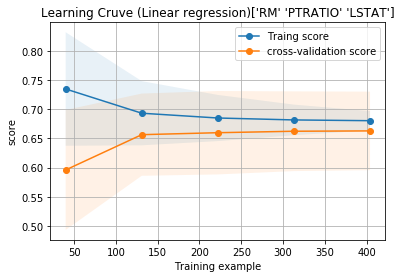

In [73]:
x = bos[corr_value.index]
y = Boston["Price"]
title = "Learning Cruve (Linear regression)" + str(x.columns.values)
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 42)
LINear = LinearRegression()
plot_learning_cruve(LINear,title, x, y, ylim = (0.7, 1.01), cv = cv, n_jobs=1)
plt.show()

### Model 3

<module 'matplotlib.pyplot' from 'C:\\Users\\Nabeel Fahmi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

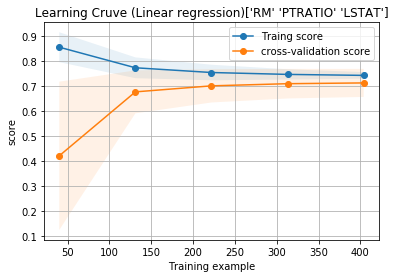

In [74]:
plot_learning_cruve(Linear,title, X,Y , ylim = (0.7, 1.01), cv = cv, n_jobs=1)

## Model 1

<module 'matplotlib.pyplot' from 'C:\\Users\\Nabeel Fahmi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

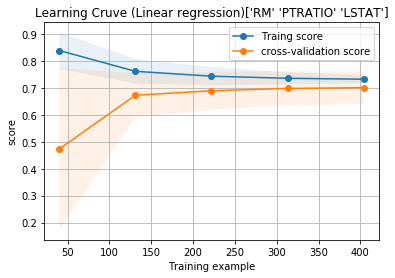

In [75]:
plot_learning_cruve(LInear,title, XX, YY, ylim = (0.7, 1.01), cv = cv, n_jobs=1)

## Regression plot for Model 2

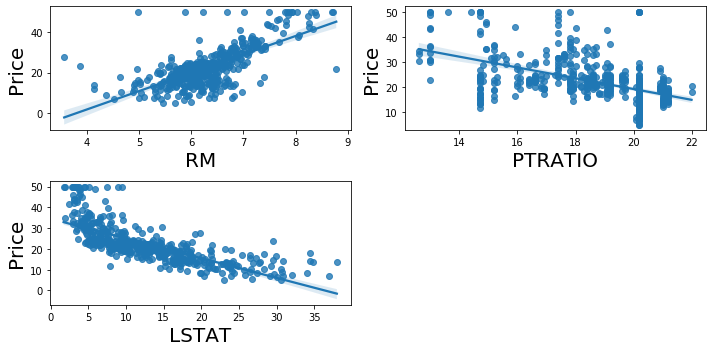

In [76]:
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in corr_value.index:
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.regplot(x = Boston[column], y = Boston["Price"])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Regression plot for Model 3

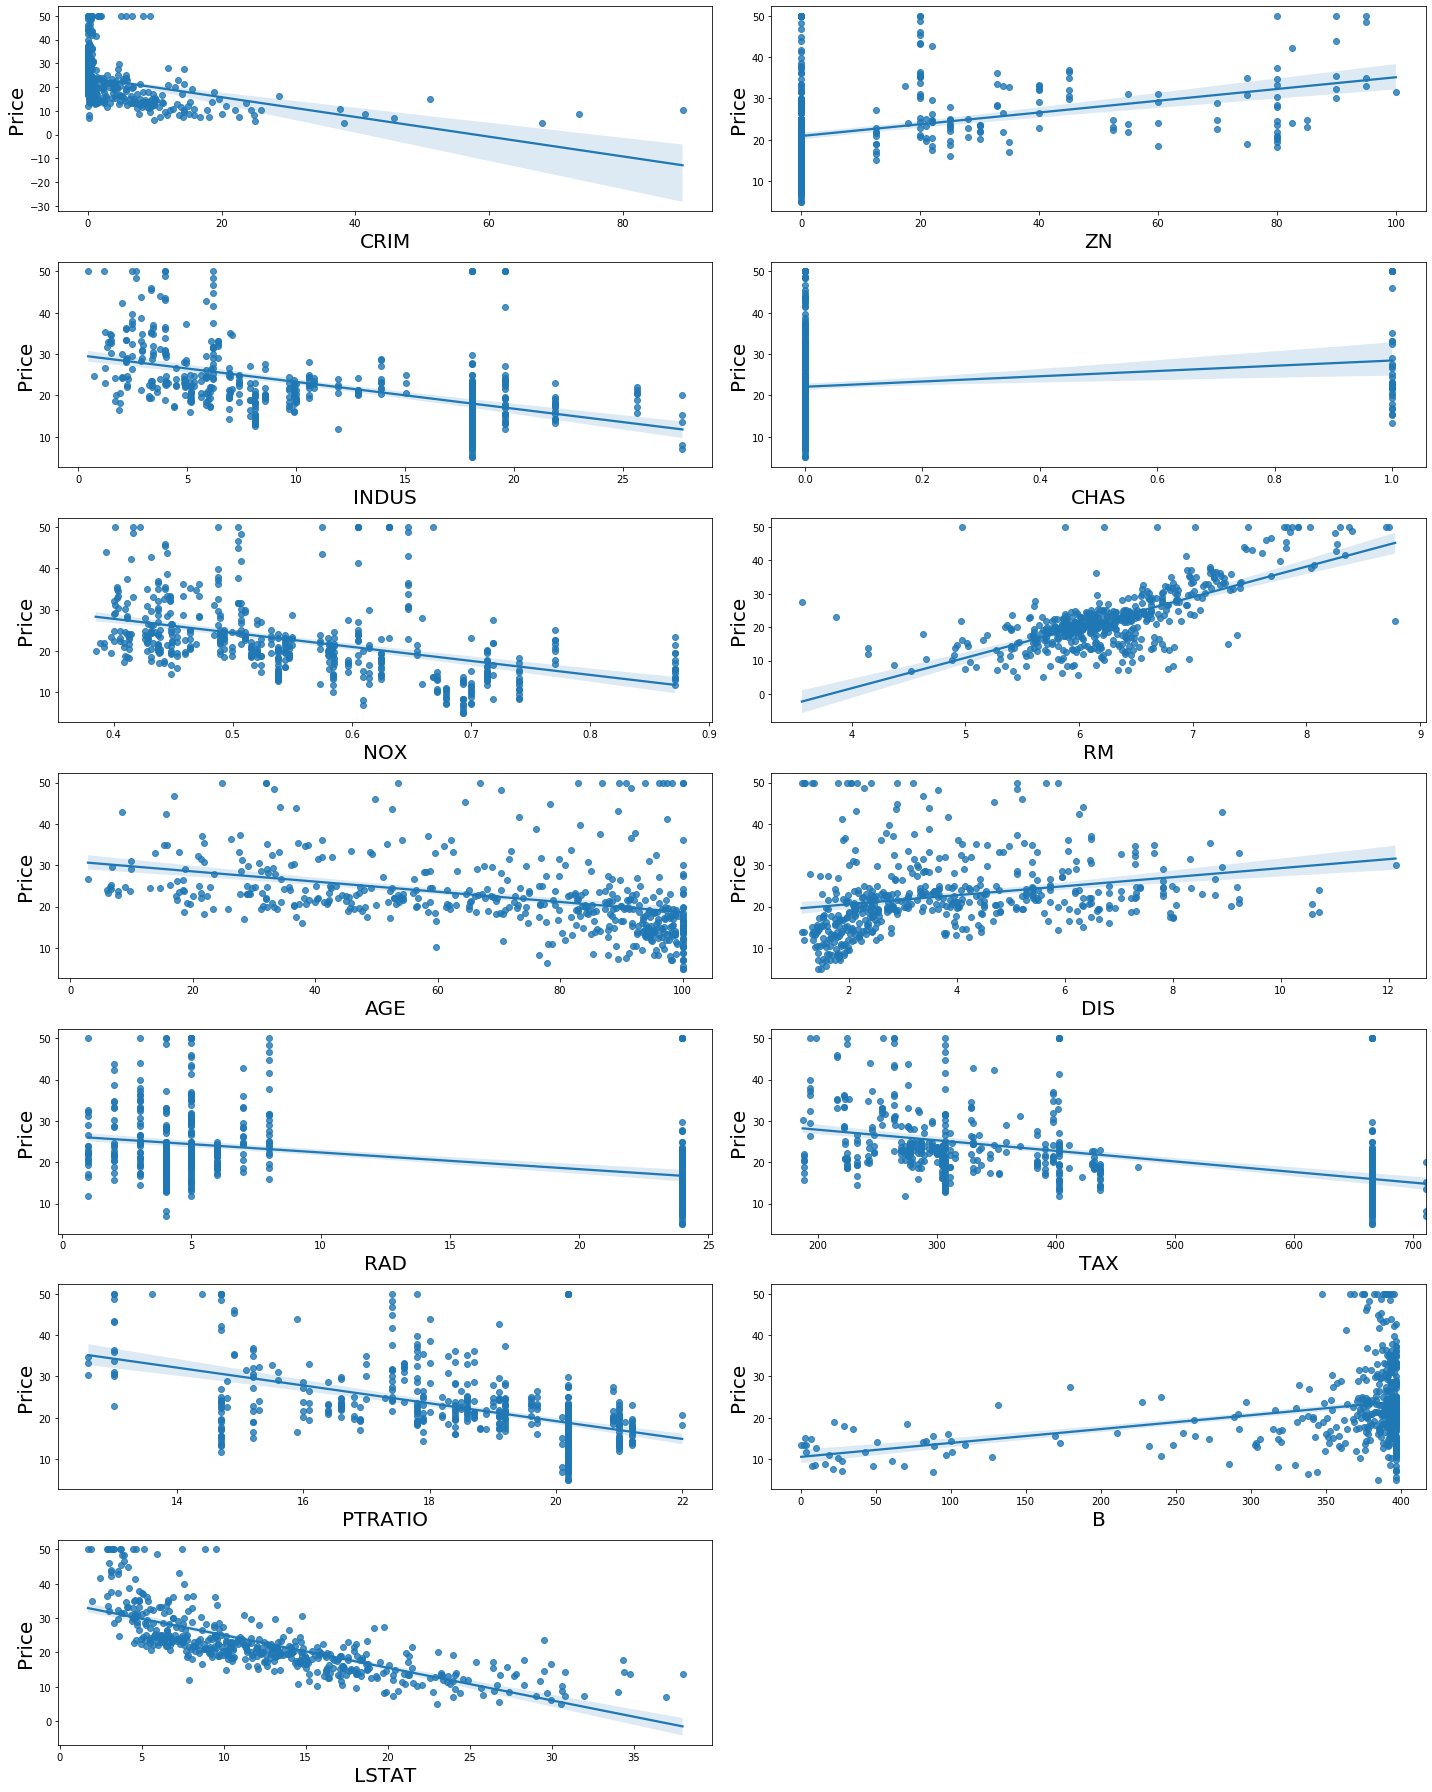

In [77]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Boston:
    if plotnumber<=16 :
        if column != "Price" :
            ax = plt.subplot(7,2,plotnumber)
            sns.regplot(x = Boston[column], y = Boston["Price"])
            plt.xlabel(column,fontsize=20)
            plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Model 1

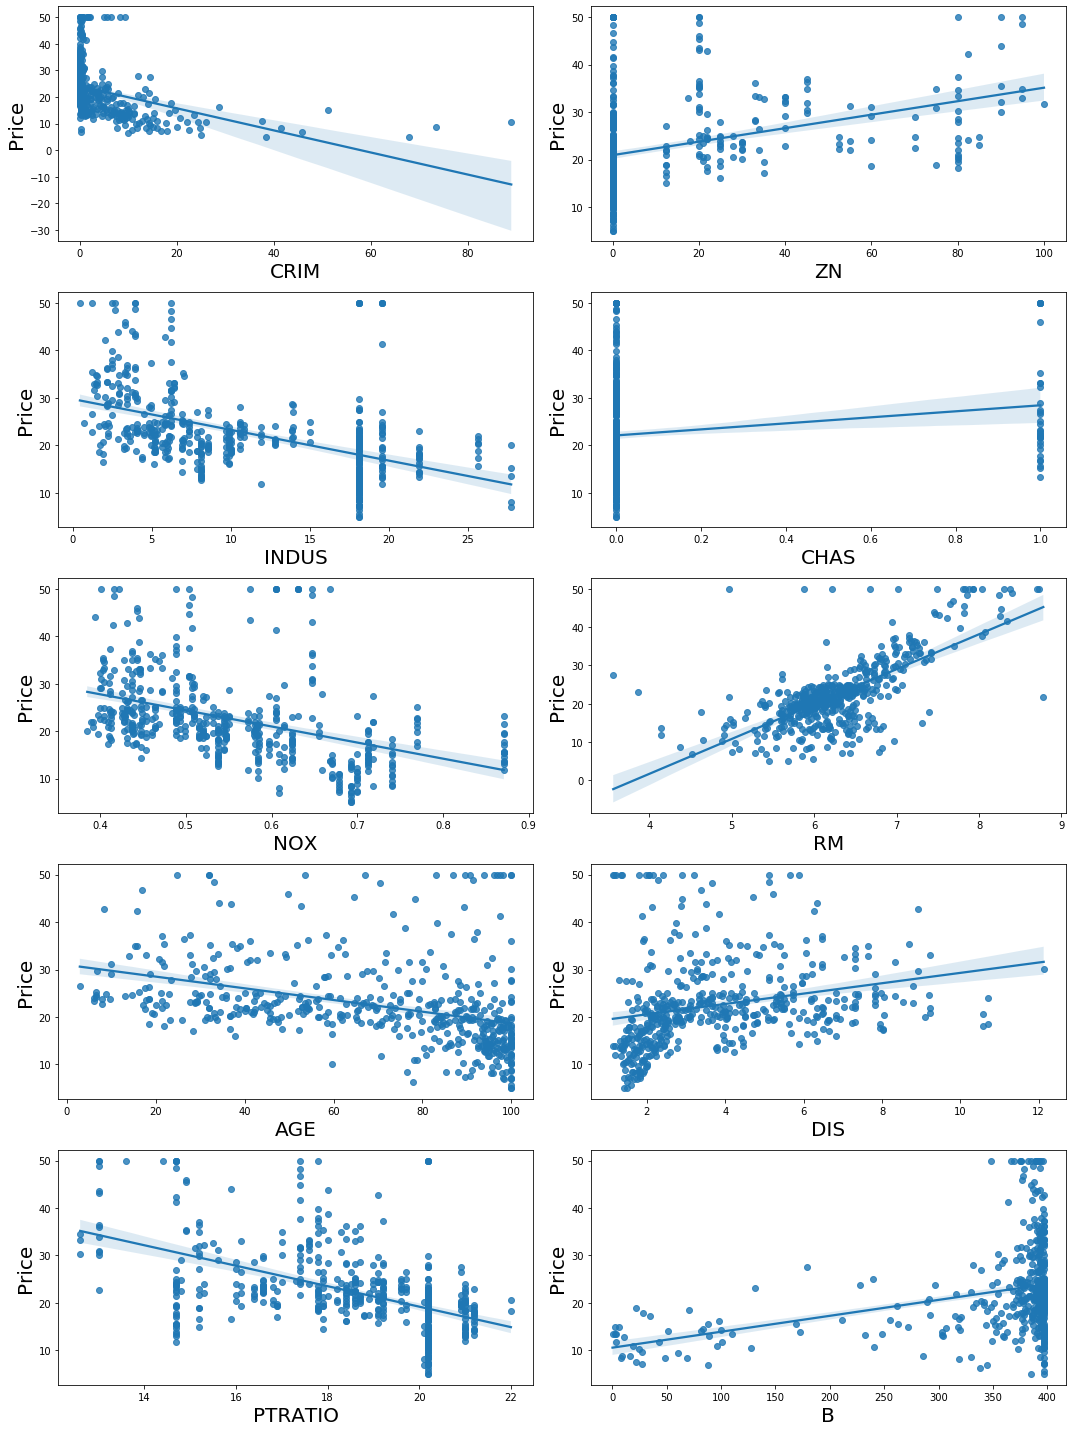

In [78]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in New:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.regplot(x = Boston[column], y = Boston["Price"])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### one more evaluation before chossing our model 

### Model 1

In [79]:
y_pred_linreg =LInear.predict(XX_test)[0:5]
y_pred_lasso  = LAsso_reg.predict(XX_test)[0:5]
y_pred_ridge = ridge_model.predict(XX_test)[0:5]
y_pred_elast = elasticnet_reg.predict(XX_test)[0:5]
predictions = pd.DataFrame()
predictions['original'] = np.array(YY_test[0:5])
predictions['linear'] = y_pred_linreg
predictions['lasso']= y_pred_lasso
predictions['ridge'] = y_pred_ridge
predictions['elasticent'] = y_pred_elast
predictions

,original,linear,lasso,ridge,elasticent
0,23.6,28.620614,28.617697,28.573179,28.920719
1,32.4,35.886036,35.876206,35.802127,32.333312
2,13.6,18.814712,18.804827,18.671696,17.652799
3,22.8,25.377724,25.374134,25.325716,25.573490
4,16.1,18.024822,18.033309,18.139911,18.630030


### Model 2

In [80]:
Y_pred_linreg = linear.predict(x_test)[0:5]
Y_pred_lasso  = Lasso_reg.predict(x_test)[0:5]
Y_pred_ridge = Ridge_model.predict(x_test)[0:5]
Y_pred_elast = Elasticnet_reg.predict(x_test)[0:5]
Predictions = pd.DataFrame()
Predictions['original'] = np.array(y_test[0:5])
Predictions['linear'] = Y_pred_linreg
Predictions['lasso']= Y_pred_lasso
Predictions['ridge'] = Y_pred_ridge
Predictions['elasticent'] = Y_pred_elast
Predictions

,original,linear,lasso,ridge,elasticent
0,23.6,26.798392,26.798475,26.799432,26.909023
1,32.4,30.783634,30.783701,30.784375,30.868183
2,13.6,16.472090,16.472133,16.471825,16.457156
3,22.8,24.943880,24.944521,24.948030,25.458769
4,16.1,18.351894,18.351680,18.349888,18.126298


### Model 3

In [81]:
Y_Pred_linreg =Linear.predict(X_test)[0:5]
Y_Pred_lasso  = lasso_reg.predict(X_test)[0:5]
Y_Pred_ridge = RIdge_model.predict(X_test)[0:5]
Y_Pred_elast = ELasticnet_reg.predict(X_test)[0:5]
PRedictions = pd.DataFrame()
PRedictions['original'] = np.array(Y_test[0:5])
PRedictions['linear'] = Y_Pred_linreg
PRedictions['lasso']= Y_Pred_lasso
PRedictions['ridge'] = Y_Pred_ridge
PRedictions['elasticent'] = Y_Pred_elast
PRedictions

,original,linear,lasso,ridge,elasticent
0,23.6,28.838854,28.834477,28.759005,28.575660
1,32.4,36.007833,35.999477,35.939418,32.322892
2,13.6,15.083248,15.073089,14.913194,13.600898
3,22.8,25.230909,25.228056,25.182583,25.877401
4,16.1,18.878641,18.884119,18.962392,18.949329


# From all Above Analisis we connlude that or Model 2 is best fit model

### Depolyment to the cloud

In [84]:
import pickle
# Writing different model files to file
with open( 'LinearRegression.pkl', 'wb') as f:
    pickle.dump(linear,f)
with open('sandardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)

In [91]:


filename1 = 'LinearRegression.pkl'
filename2 = 'sandardScalar.pkl'
loaded_model1 = pickle.load(open(filename1, 'rb'))
loaded_model2 = pickle.load(open(filename2, 'rb'))
final_features = [np.array([6.575,15.3,4.98])]
final_features

[array([ 6.575, 15.3  ,  4.98 ])]

In [93]:
PREdiction=loaded_model1.predict(final_features) 
print(PREdiction[0])

31.036302984189724
